# Tech Company Layoff 

<b> Import Libraries

In [41]:
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

<b> Data Quality Assessment

In [2]:
df = pd.read_csv('tech_company_layoff_2.csv', encoding= 'latin-1')
df.head(5)

,Company,Location HQ,Date,Industry,Stage,$ Raised (mm),Country,lay Off,Impacted workforce percentage
0,Bundle Africa,Lagos\r,7/21/2023,Crypto,Seed,1.0,Nigeria,0,1.00
1,Viaplay,Stockholm\r,7/20/2023,Media,Unknown,NaN,Sweden,450,0.25
2,Stoa,Phoenix,7/20/2023,Real Estate,Unknown,NaN,United States,80,0.80
3,Dunzo,Bengaluru\r,7/20/2023,Food,Unknown,382.0,India,0,0.00
4,MiQ,London\r,7/20/2023,Marketing,Private Equity,NaN,United Kingdom,0,0.00


<b> Rename Columns
       
For more readibility

In [3]:
df.rename(columns = {'Location HQ' : 'Location', 'Lay Off' : 'Total_layoff', 'Impacted workforce percentage' : "Impacted_workforce_percentage",
                    'Stage' : "Funding_stage", '$ Raised (mm)' : 'Amount_Raised_(million)', 'lay Off' : 'Lay_Off'}, inplace = True)

In [4]:
#shape of the dataset

df.shape

(2850, 9)

<b> check for missing rows in each columns

Though, some cleaning such as null value and unclear value have been taken off with excel.
    
<b> The cleanings are as follows:
    
Unclear values replaced with 0
    
Null cells replaced with 0
    
Unknown in Total_layoff column replaced with 0
    
This was done to reduce the effect of null rows dropping and to asertain greater precision during the analysis

In [5]:
df.isnull().sum()

Company                            0
Location                           0
Date                               0
Industry                           0
Funding_stage                      0
Amount_Raised_(million)          293
Country                            0
Lay_Off                            0
Impacted_workforce_percentage      0
dtype: int64

In [7]:
df.Location.unique()

array(['Lagos\r', 'Stockholm\r', 'Phoenix', 'Bengaluru\r', 'London\r',
       'Austin', 'Denver', 'Seattle', 'Chicago', 'New York City',
       'Salt Lake City', 'Minneapolis', 'San Diego', 'Tel Aviv',
       'Jakarta', 'Cayman Islan...', 'Bengaluru', 'Chennai',
       'SF Bay Area', 'Tampa Bay', 'Sydney', 'Barcelona', 'Raleigh',
       'Philadelphia', 'Vancouver', 'Dublin', 'Miami', 'Boston',
       'Evansville', 'Nashville', 'Montreal', 'Lagos', 'St. Louis',
       'London', 'Sacramento', 'Singapore', 'Auckland', 'Berlin',
       'Los Angeles', "Ra'anana", 'Mexico City', 'Førde', 'Manchester',
       'Toronto', 'Detroit', 'Boise', 'Alamosa', 'Amsterdam', 'Seoul',
       'Kansas City', 'Gurugram', 'Sao Paulo', 'Washington ...',
       'Columbus', 'Melbourne', 'Baltimore', 'Nairobi', 'Stockholm',
       'Reno', 'Chemnitz', 'New Delhi', 'Hamburg', 'Charlottesville',
       'Kfar Saba', 'Hangzhou', 'Krakow', 'Mumbai', 'Haifa',
       'Santa Barbara', 'Houston', 'Indianapolis', 'Norfolk',

<b> Data Issues:
    
    Lagos\r,
    
    Stockholm\r
    
    Bengaluru\r
    
    London\r
    
    F⌀rde,
    
    MalmÖ,
    
    Non-U.S
    
    Mahe
    
    Wroc?aw
    
    SF Bay Area

In [4]:
#resolving data issues on Location column
df.Location.replace({'Lagos\r' : "Lagos", "Stockholm\r" : "Stockholm", "Bengaluru\r" : "Bengaluru", "London\r" : "London",
                    "Førde" : "Forde", 'Malmö' : 'Malmo', "Non-U.S." : "Mahe", "Wroc?aw" : "Wroclaw", 'SF Bay Area' : 'San Francisco'}, inplace = True)

df.head(5)

,Company,Location,Date,Industry,Funding_stage,Amount_Raised_(million),Country,Lay_Off,Impacted_workforce_percentage
0,Bundle Africa,Lagos,7/21/2023,Crypto,Seed,1.0,Nigeria,0,1.00
1,Viaplay,Stockholm,7/20/2023,Media,Unknown,NaN,Sweden,450,0.25
2,Stoa,Phoenix,7/20/2023,Real Estate,Unknown,NaN,United States,80,0.80
3,Dunzo,Bengaluru,7/20/2023,Food,Unknown,382.0,India,0,0.00
4,MiQ,London,7/20/2023,Marketing,Private Equity,NaN,United Kingdom,0,0.00


In [5]:
#convert the date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df['Mon_Year'] = df['Date'].dt.strftime('%b %Y')

#custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#df['Month'] = pd.Categorical(df['Month'], categories = custom_order, ordered = True)


df['Year'] = df['Date'].dt.strftime('%Y')

In [9]:
df.head()

,Company,Location,Date,Industry,Funding_stage,Amount_Raised_(million),Country,Lay_Off,Impacted_workforce_percentage,Mon_Year,Year
0,Bundle Africa,Lagos,2023-07-21,Crypto,Seed,1.0,Nigeria,0,1.00,Jul 2023,2023
1,Viaplay,Stockholm,2023-07-20,Media,Unknown,NaN,Sweden,450,0.25,Jul 2023,2023
2,Stoa,Phoenix,2023-07-20,Real Estate,Unknown,NaN,United States,80,0.80,Jul 2023,2023
3,Dunzo,Bengaluru,2023-07-20,Food,Unknown,382.0,India,0,0.00,Jul 2023,2023
4,MiQ,London,2023-07-20,Marketing,Private Equity,NaN,United Kingdom,0,0.00,Jul 2023,2023


In [6]:
#save the cleaned dataset
df.to_csv('tech_layoff.csv', index = False)

In [12]:
df.dtypes

Company                                  object
Location                                 object
Date                             datetime64[ns]
Industry                                 object
Funding_stage                            object
Amount_Raised_(million)                 float64
Country                                  object
Lay_Off                                   int64
Impacted_workforce_percentage           float64
Month                                  category
Year                                     object
dtype: object

<b> Data Vizualization

<b> Q1. The trend of layoff from 2020 to 2023

In [7]:
lay_off_date = df.groupby("Year")["Lay_Off"].sum().reset_index()
lay_off_date.rename(columns = {"Lay_Off" : 'Sum of layoff'}, inplace = True)
lay_off_date = lay_off_date.sort_values(by = 'Year', ascending = False)
lay_off_date

,Year,Sum of layoff
3,2023,221655
2,2022,164744
1,2021,15823
0,2020,80998


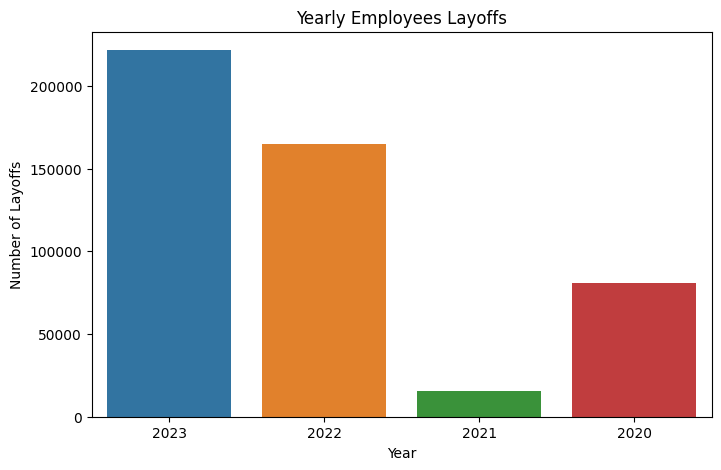

In [8]:
plt.figure(figsize = (8,5))
sb.barplot(lay_off_date, x= 'Year', y= 'Sum of layoff', hue = 'Year')
plt.title('Yearly Employees Layoffs')
plt.ylabel('Number of Layoffs')
plt.show()

The above shows that 2023 has the highest number of layoffs.

let's look at layoff trend from January 2022 to July 2023

In [9]:
#group year and month wrt layoff
lay_off_tim = df.groupby(['Year', 'Mon_Year'])['Lay_Off'].sum().reset_index() 
lay_off_tim.rename(columns = {'Lay_Off' : 'Employees_laid_off'}, inplace = True)
lay_off_tim= lay_off_tim.sort_values(by = 'Year', ascending = False)

lay_off_tim = lay_off_tim.query("Employees_laid_off != 0")

lay_off_tim_23 = lay_off_tim.loc[(lay_off_tim["Year"] == '2023') | (lay_off_tim["Year"] == '2022')]
lay_off_tim.head(5)

,Year,Mon_Year,Employees_laid_off
40,2023,May 2023,14928
39,2023,Mar 2023,37823
38,2023,Jun 2023,10994
37,2023,Jul 2023,8321
36,2023,Jan 2023,89554


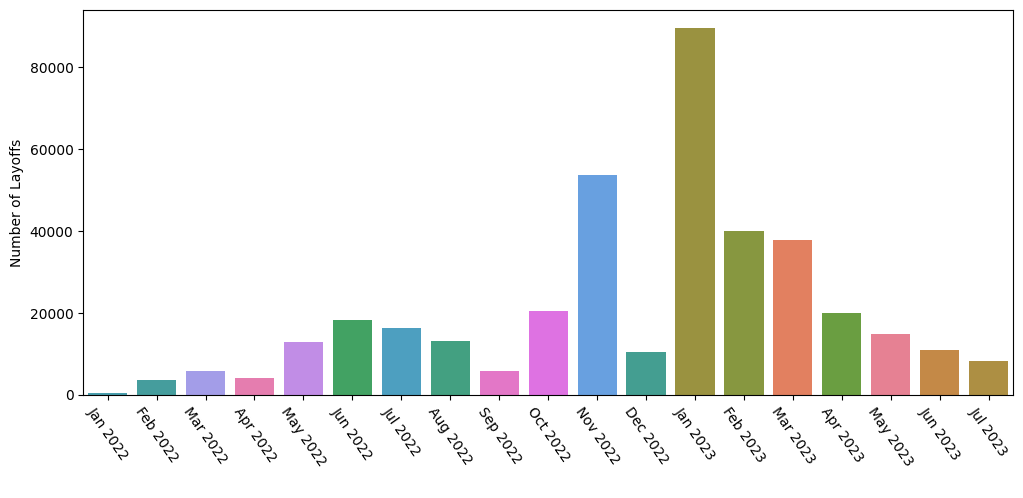

In [10]:
plt.figure(figsize = (12,5))
sb.barplot(lay_off_tim_23, x = "Mon_Year", y = "Employees_laid_off", hue = 'Mon_Year', 
           order = ['Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022', 'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022',
                   'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023'])
plt.ylabel('Number of Layoffs')
plt.xlabel(' ')
plt.xticks(rotation = 305)
plt.show()

Though, the year has the highest number of layoffs since Covid-19 but there has been a decline from January till date.
This may suggest 

<b> Q2: The Country with the highest number of layoff

In [11]:
df_country = df.groupby('Country')['Lay_Off'].sum().rename('Number_of_layoff').reset_index()

country = df_country.sort_values(by = 'Number_of_layoff', ascending = False).head(10) #top ten countries

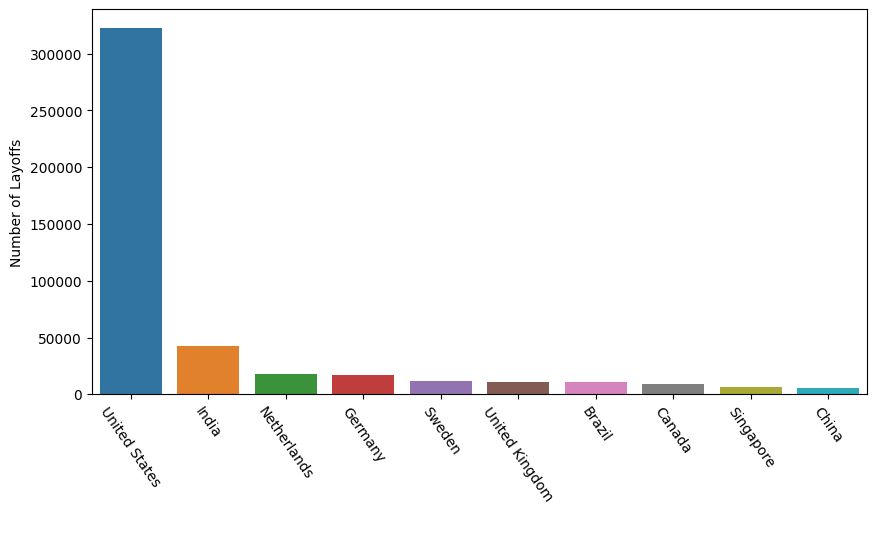

In [13]:
plt.figure(figsize = (10, 5))
sb.barplot(country, x = 'Country', y = 'Number_of_layoff', hue = 'Country')
plt.xlabel(' ')
plt.ylabel('Number of Layoffs')
plt.xticks(rotation = 305)
plt.show()

#United States has the highest number of layoff followed by India, Netherlands and Germany

Let's look at percentage layoff by United States to Other countries

In [21]:
def percent_usa(col):
    if col == 'United States':
        return col
    else:
        return 'Others'


df_country['country_grp'] = df_country['Country'].apply(percent_usa)

#df_country['country_grp'] = df_country['Country'].apply(lambda col: col if col == 'United States' else 'Others')

df_country.head(5)

,Country,Number_of_layoff,country_grp
0,Argentina,323,Others
1,Australia,3533,Others
2,Austria,640,Others
3,Bahrain,0,Others
4,Belgium,0,Others


In [24]:
usa_percent = df_country.groupby("country_grp")["Number_of_layoff"].sum().reset_index()
usa_percent.rename(columns = {"Number_of_layoff" : "Layoffs"}, inplace = True)
usa_percent = usa_percent.sort_values(by = 'Layoffs', ascending = False)
usa_percent

,country_grp,Layoffs
1,United States,322774
0,Others,160446


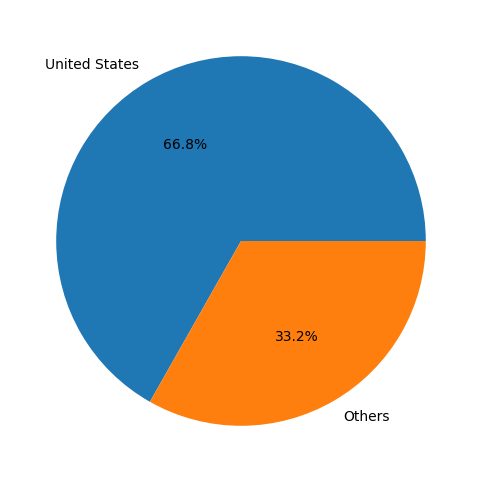

In [30]:
plt.figure(figsize = (6,6))
plt.pie(usa_percent['Layoffs'], labels = usa_percent['country_grp'], autopct = "%1.1f%%")
plt.show()

hmmmmmmm.............United States contributed to 66.7% of the total layoffs.


Okay.........let's consider layoff across companies

<b> Q3: The company with the highest number of layoff

In [38]:
df_comp = df.groupby('Company')['Lay_Off'].sum().rename('Sum_of_layoff').reset_index()
df_comp = df_comp.sort_values(by = 'Sum_of_layoff', ascending = False)
df_comp = df_comp.head(10)


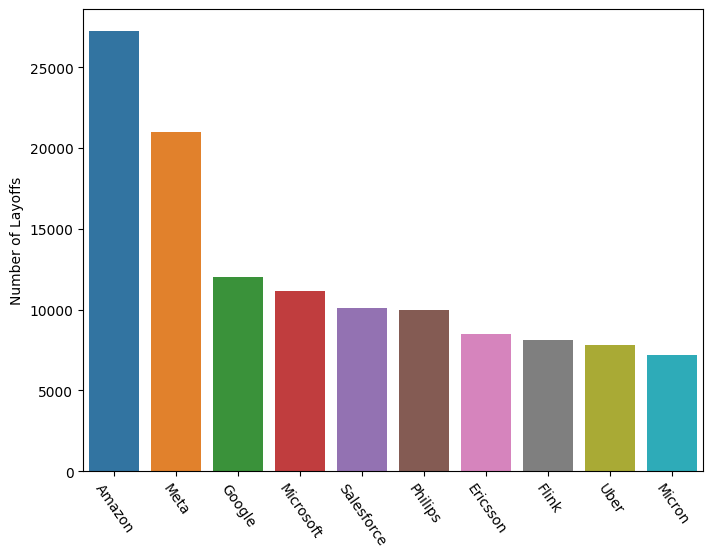

In [40]:
plt.figure(figsize = (8,6))
sb.barplot(df_comp, x = 'Company', y = 'Sum_of_layoff', hue = 'Company')
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.xticks(rotation = 305)
plt.show()

Amazaon, Meta and Google at the peak of layoff since covid 19

Amazon. Meta, Google and Microsoft have it here to be the companies with the highest number of layoff

<b> Q4: The Industry with the highest number of layoff

In [44]:
df_ind = df.groupby('Industry')['Lay_Off'].sum().rename('Sum_of_layoff').reset_index()
df_ind = df_ind.sort_values(by = 'Sum_of_layoff', ascending = False).query('Industry != "Other"') #drop other from the list of industry.
df_ind = df_ind.head(10)

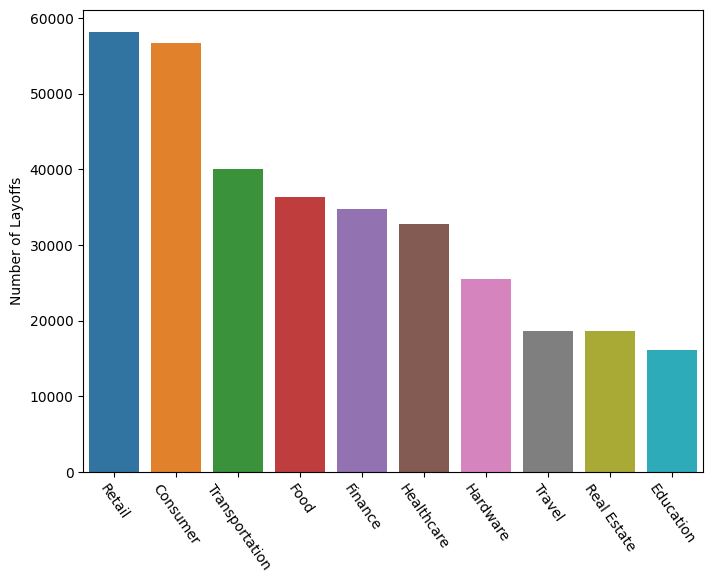

In [45]:
plt.figure(figsize = (8,6))
sb.barplot(df_ind, x = 'Industry', y = 'Sum_of_layoff', hue = 'Industry')
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.xticks(rotation = 305)
plt.show()

In [46]:
#Frequency of occurence of each industry
docx = ' '.join(df['Industry'].to_list())

In [47]:
def plot_wordcloud(text):
    mywordcloud = WordCloud().generate(text)
    plt.imshow(mywordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show(block =True)

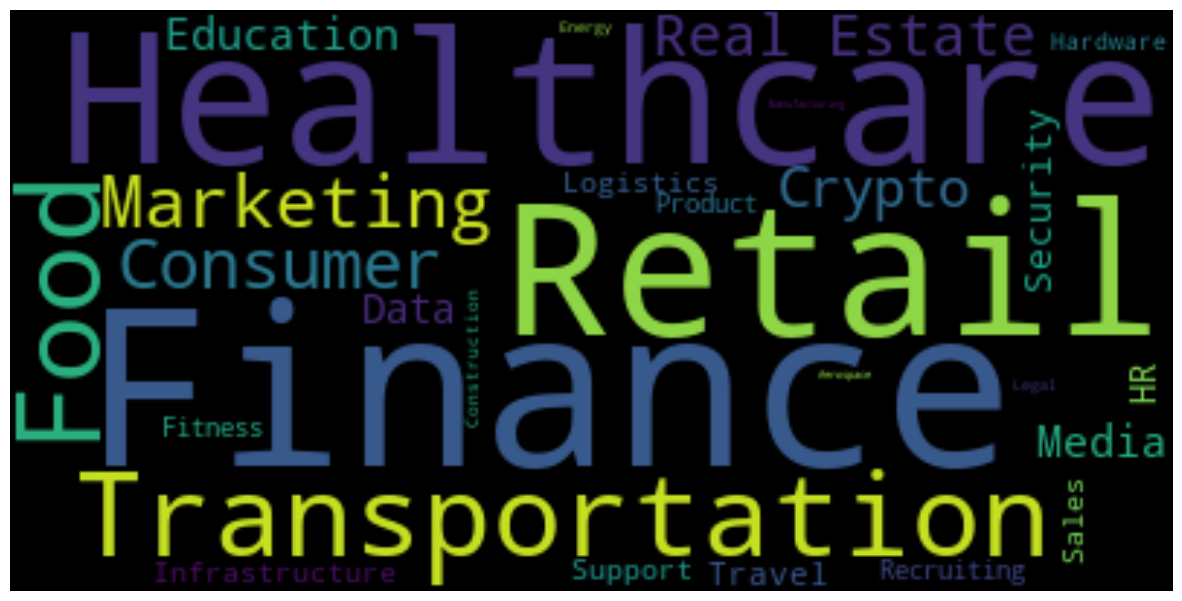

In [48]:
plt.figure(figsize = (15, 10))
plot_wordcloud(docx)
plt.show()

<b> Word Clouds are great way to visualize text data. A wordcloud visualizes how often words appears in a given piece of text. The more often a word appears, the larger it will be in the word cloud. 
    
<b> Hence, The industries mostly affected by the layoff are: Healthcare, Finance and Retail

<b> Conclusion:

<b>The tech industry has been hit hard by an unprecedented wave of layoffs this year. According to the charts, many organizations let go of a staggering 221,655 employees, marking a 35 percent increase over the previous year's record of 164,744 layoffs in 2022. These numbers are alarming and suggest a troubling downturn in the tech sector.
